In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


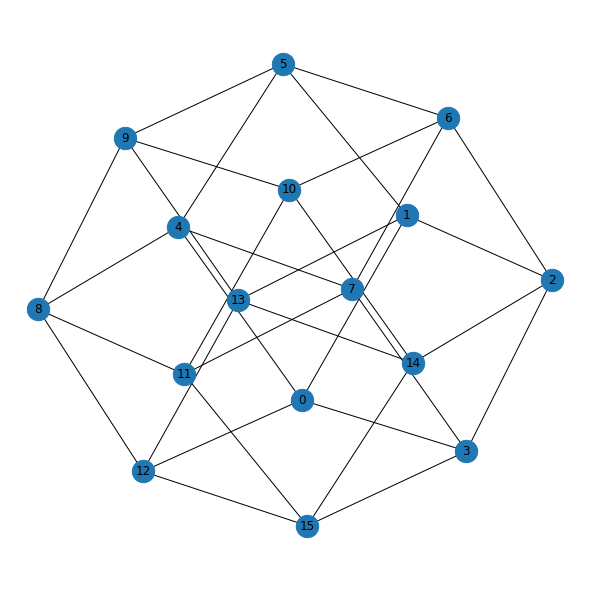

In [15]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)
betas_fast = np.arange(0.1,2,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [16]:
imp.reload(solvers)
import model
imp.reload(model)
model_2d_h0_spinglass = model.model(N, H, J, J_interaction)
res_ex_2d_h0_spinglass = solvers.exact_sol(model_2d_h0_spinglass, betas_fast)

beta: 0.1, Fe: -6.999 Energy: -0.134 M: 0.0 S: 0.686 -1.12e+02
beta: 0.2, Fe: -3.599 Energy: -0.264 M: 0.0 S: 0.667 -57.5
beta: 0.3, Fe: -2.508 Energy: -0.385 M: 0.0 S: 0.637 -40.1
beta: 0.4, Fe: -1.991 Energy: -0.496 M: 0.0 S: 0.598 -31.8
beta: 0.5, Fe: -1.702 Energy: -0.594 M: 3.32e-18 S: 0.5542
beta: 0.6, Fe: -1.525 Energy: -0.68 M: 2.23e-17 S: 0.507.4
beta: 0.7, Fe: -1.410 Energy: -0.753 M: 4.52e-17 S: 0.4654
beta: 0.8, Fe: -1.331 Energy: -0.814 M: 1.38e-16 S: 0.4143
beta: 0.9, Fe: -1.277 Energy: -0.865 M: 1.46e-16 S: 0.37.4
beta: 1.0, Fe: -1.238 Energy: -0.907 M: 1.53e-16 S: 0.3318
beta: 1.1, Fe: -1.209 Energy: -0.941 M: 2.31e-16 S: 0.2963
beta: 1.2, Fe: -1.188 Energy: -0.968 M: 3.86e-16 S: 0.2650
beta: 1.3, Fe: -1.172 Energy: -0.989 M: 2.7e-16 S: 0.238.7
beta: 1.4, Fe: -1.160 Energy: -1.01 M: 3.69e-16 S: 0.21558
beta: 1.5, Fe: -1.150 Energy: -1.02 M: 2.4e-16 S: 0.1958.4
beta: 1.6, Fe: -1.142 Energy: -1.03 M: 3.48e-16 S: 0.178.3
beta: 1.7, Fe: -1.136 Energy: -1.04 M: 1.82e-16 S: 0

In [17]:
imp.reload(solvers)
import solvers

res_nn_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, 
                                        max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=1000)
res_nn_2d_h0_spinglass["name"]="nn"

fe: -6.998 std_fe: 1.95E-02 M: 0.010 S: 0.687 E: -0.131: 0.0204, B1 = -0.003
fe: -3.598 std_fe: 3.66E-02 M: 0.009 S: 0.668 E: -0.256: 0.0183, B1 = 0.007
fe: -2.502 std_fe: 5.11E-02 M: 0.009 S: 0.641 E: -0.364: 0.0302, B1 = 0.018
fe: -1.980 std_fe: 6.30E-02 M: 0.009 S: 0.609 E: -0.458: 0.025, B1 = -0.012
fe: -1.683 std_fe: 7.14E-02 M: 0.012 S: 0.573 E: -0.537: 0.0266, B1 = -0.012
fe: -1.499 std_fe: 7.51E-02 M: 0.009 S: 0.526 E: -0.622: 0.0254, B1 = -0.005
fe: -1.380 std_fe: 6.96E-02 M: 0.010 S: 0.469 E: -0.710: 0.0261, B1 = 0.032
fe: -1.302 std_fe: 5.86E-02 M: 0.009 S: 0.403 E: -0.798: 0.0454, B1 = -0.003
fe: -1.250 std_fe: 4.50E-02 M: 0.008 S: 0.332 E: -0.882: 0.0196, B1 = -0.013
fe: -1.216 std_fe: 3.55E-02 M: 0.006 S: 0.281 E: -0.935: 0.0131, B1 = 0.0094
fe: -1.192 std_fe: 2.87E-02 M: 0.007 S: 0.245 E: -0.969: 0.0189, B1 = 0.0080
fe: -1.175 std_fe: 2.21E-02 M: 0.005 S: 0.216 E: -0.995: 0.0529, B1 = -0.001
fe: -1.161 std_fe: 1.68E-02 M: 0.004 S: 0.193 E: -1.013: 0.0252, B1 = 0.0084
fe:

In [18]:
res_nn_z2_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, 
                                           betas_fast, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False, 
                                           batch_size=1000)
res_nn_z2_2d_h0_spinglass["name"]="nn_z2"

fe: -6.999 std_fe: 1.60E-02 M: 0.008 S: 0.687 E: -0.133: 0.0211, B1 = -0.031
fe: -3.598 std_fe: 2.84E-02 M: 0.009 S: 0.667 E: -0.261: 0.0289, B1 = -0.082
fe: -2.505 std_fe: 3.86E-02 M: 0.012 S: 0.640 E: -0.372: 0.0274, B1 = -0.151
fe: -1.985 std_fe: 4.45E-02 M: 0.007 S: 0.602 E: -0.481: 0.0242, B1 = -0.251
fe: -1.692 std_fe: 4.88E-02 M: 0.007 S: 0.565 E: -0.562: 0.0289, B1 = -0.485
fe: -1.512 std_fe: 5.12E-02 M: 0.007 S: 0.518 E: -0.650: 0.0212, B1 = -0.718
fe: -1.393 std_fe: 4.94E-02 M: 0.010 S: 0.470 E: -0.722: 0.0294, B1 = -1.024
fe: -1.315 std_fe: 4.63E-02 M: 0.007 S: 0.413 E: -0.799: 0.0213, B1 = -1.360
fe: -1.261 std_fe: 4.18E-02 M: 0.005 S: 0.366 E: -0.854: 0.0215, B1 = -1.645
fe: -1.224 std_fe: 3.10E-02 M: 0.013 S: 0.310 E: -0.914: 0.0241, B1 = -1.734
fe: -1.198 std_fe: 2.45E-02 M: 0.005 S: 0.269 E: -0.953: 0.0559, B1 = -2.053
fe: -1.178 std_fe: 2.00E-02 M: 0.007 S: 0.236 E: -0.982: 0.043, B1 = -2.3349
fe: -1.164 std_fe: 1.82E-02 M: 0.003 S: 0.210 E: -1.003: 0.059, B1 = -2.5756

In [19]:
import imp
import bp_nn
imp.reload(solvers)
res_nn_is = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, 
                           max_step=1000,batch_size=1000,
                           bias = True, z2 = False, x_hat_clip = False, 
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -6.999 std_fe: 2.17E-05 M: -0.045 S: 0.686 E: -0.138 0.0217, B1 = -0.001
fe: -3.599 std_fe: 4.20E-05 M: 0.019 S: 0.667 E: -0.267: 0.0224, B1 = 0.000
fe: -2.508 std_fe: 6.14E-05 M: -0.014 S: 0.635 E: -0.390 0.0312, B1 = 0.000
fe: -1.992 std_fe: 8.02E-05 M: 0.037 S: 0.599 E: -0.493: 0.0249, B1 = 0.017
fe: -1.701 std_fe: 1.00E-04 M: -0.180 S: 0.553 E: -0.596 0.0151, B1 = -0.006
fe: -1.525 std_fe: 1.27E-04 M: 0.053 S: 0.510 E: -0.675: 0.021, B1 = 0.0021
fe: -1.408 std_fe: 1.76E-04 M: 0.094 S: 0.457 E: -0.754: 0.0236, B1 = 0.015
fe: -1.334 std_fe: 5.17E-04 M: 0.373 S: 0.414 E: -0.817: 0.0459, B1 = -0.009
fe: -1.281 std_fe: 9.31E-04 M: 0.256 S: 0.379 E: -0.860: 0.0325, B1 = 0.0118
fe: -1.232 std_fe: 2.93E-04 M: 0.240 S: 0.306 E: -0.926: 0.0176, B1 = 0.0200
fe: -1.201 std_fe: 2.47E-04 M: -0.047 S: 0.271 E: -0.955 0.0336, B1 = 0.0083
fe: -1.181 std_fe: 1.91E-04 M: -0.067 S: 0.233 E: -0.987 0.0279, B1 = 0.0016
fe: -1.168 std_fe: 4.56E-04 M: -0.195 S: 0.216 E: -1.002 0.018, B1 = -0.0060
fe: 

In [20]:
imp.reload(solvers)
res_bp_2d_h0_spinglass = solvers.bp_sol(model_2d_h0_spinglass, betas_fast)
res_bp_2d_h0_spinglass["name"]="bp"

fe: -6.999, ener: -0.134, M: 0.000, iter 8
fe: -3.600, ener: -0.265, M: 0.000, iter 8
fe: -2.509, ener: -0.388, M: 0.000, iter 10
fe: -1.993, ener: -0.502, M: 0.000, iter 14
fe: -1.705, ener: -0.604, M: 0.000, iter 17
fe: -1.530, ener: -0.695, M: 0.000, iter 22
fe: -1.416, ener: -0.774, M: 0.000, iter 35
fe: -1.340, ener: -0.843, M: 0.000, iter 61
fe: -1.288, ener: -0.902, M: 0.000, iter 151
fe: -1.249, ener: -0.949, M: 0.163, iter 1000
fe: -1.212, ener: -0.984, M: 0.325, iter 1000
fe: -1.207, ener: -0.996, M: 0.373, iter 1000
fe: -1.189, ener: -1.033, M: 0.479, iter 1000
fe: -1.186, ener: -1.012, M: 0.464, iter 1000
fe: -1.160, ener: -1.081, M: 0.620, iter 1000
fe: -1.136, ener: -1.091, M: 0.682, iter 1000
fe: -1.118, ener: -1.114, M: 0.519, iter 1000
fe: -1.142, ener: -1.106, M: 0.745, iter 1000
fe: -1.142, ener: -1.110, M: 0.756, iter 1000


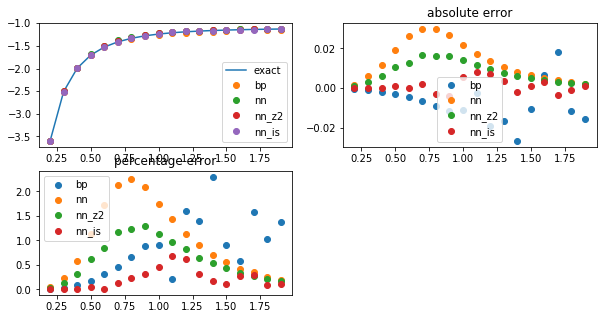

In [22]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,                         
                            res_nn_z2_2d_h0_spinglass,
                            res_nn_is],
                           init_=1)
#plt.ylim(-0.1,0.11)
plt.show()

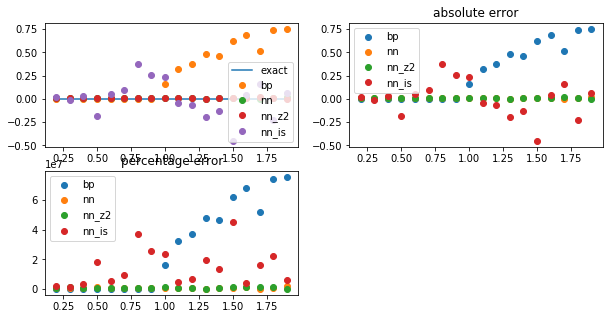

In [23]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,                         
                            res_nn_z2_2d_h0_spinglass,
                            res_nn_is],
                          init_=1)
plt.show()

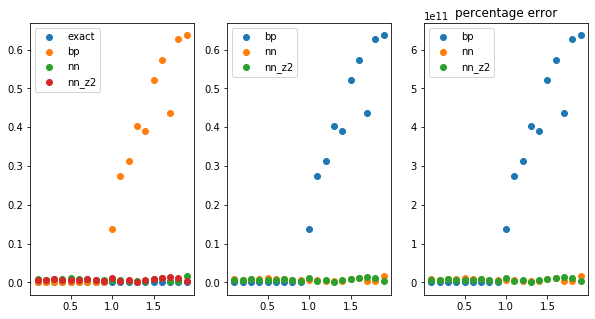

In [24]:
%matplotlib inline
imp.reload(solvers)
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass])
plt.show()

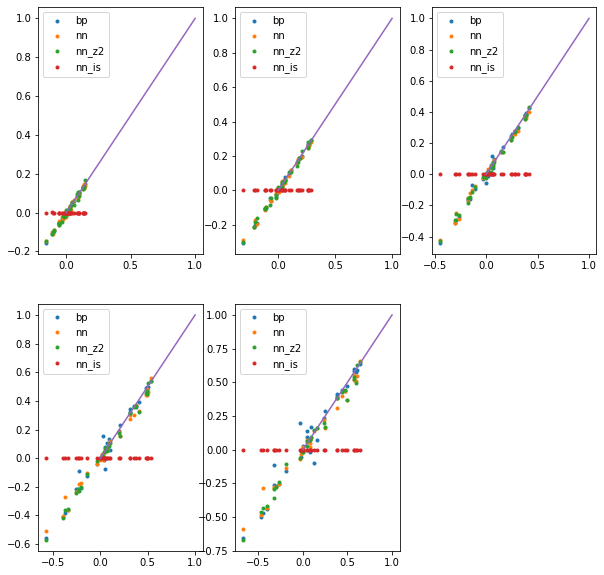

In [27]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[5:10], res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,                         
                            res_nn_z2_2d_h0_spinglass,
                            res_nn_is],
                            J_interaction)
plt.show()